# **<h1><span style="color:red"><u>Insérez le nom de votre projet</u></span></h1>**
**Réalisé par : Insérez votre nom**

### <span style="color:yellow"> 0. Importation des librairies</span> 

In [2]:
pip install cufflinks --upgrade

Requirement already up-to-date: cufflinks in /home/samy/anaconda3/lib/python3.7/site-packages (0.17.3)


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.express as px

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

## <span style="color:red"> I. Audit, exploration, et nettoyage des données</span> 

### <span style="color:blue"> **A. Exploration et analyse de données**</span> 

In [127]:
#import dataset
churn = pd.read_csv('churn.csv')
churn.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [22]:
churn.info()
#le dataset contient 21 colonnes et 5986 lignes
#la table de donnees contient 3 colonnes de type numérique et le reste de type catégorielle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


In [23]:
#Vérifier les doublons
churn.duplicated().sum()
print("Il existe ", churn.duplicated().sum(), "doublons dans la dataset")

Il existe  0 doublons dans la dataset


In [129]:
#remplacer les valeurs vides par les nan
churn = churn.replace(' ', np.nan)

In [130]:
#Vérifier les valeurs manquantes
churn.isna().sum().any()
churn.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [ ]:
#la colonne TotalCharges contient 10 valeurs manquantes

In [131]:
#les elements uniques de chaque variable
churn.nunique(axis=0, dropna=True)
#Toutes les valeurs de la variable customerID sont uniques, on devrait peut-etre le supprimer pour la prediction

customerID          5986
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1526
TotalCharges        5610
Churn                  2
dtype: int64

In [28]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213
std,0.367909,24.516391,30.114702
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.650000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


In [27]:
churn.describe(include=object).T

,count,unique,top,freq
customerID,5986,5986,3186-BAXNB,1
gender,5986,2,Male,3050
Partner,5986,2,No,3082
Dependents,5986,2,No,4195
PhoneService,5986,2,Yes,5396
MultipleLines,5986,3,No,2848
InternetService,5986,3,Fiber optic,2627
OnlineSecurity,5986,3,No,2982
OnlineBackup,5986,3,No,2605
DeviceProtection,5986,3,No,2640


In [13]:
#La variable TotalCharges est une variable numérique qui est considérée comme catégorielle, on devrait  changer son type

### <span style="color:blue"> **B. Traitement de données**</span> 

In [132]:
#convertir TotalCharges en numérique
churn["TotalCharges"] = pd.to_numeric(churn["TotalCharges"])

#convertir SeniorCitizen to categoriel
churn["SeniorCitizen"] = churn["SeniorCitizen"].astype(str)

#on remplace les valeurs manquantes par la mediane 
churn['TotalCharges'] = churn['TotalCharges'].fillna(churn['TotalCharges'].median())

#Verifier si il reste des nan
churn.isna().sum().any()#il reste plus de valeures manquantes dans la table


False

In [133]:
#la variable  customerID ne va pas nous aider dans la prediction, on peut supprimer cette variable
drop_columns = ["customerID"]
churn.drop(drop_columns, axis = 1, inplace = True)

churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


### <span style="color:blue"> **C. Distribution des variables**</span> 

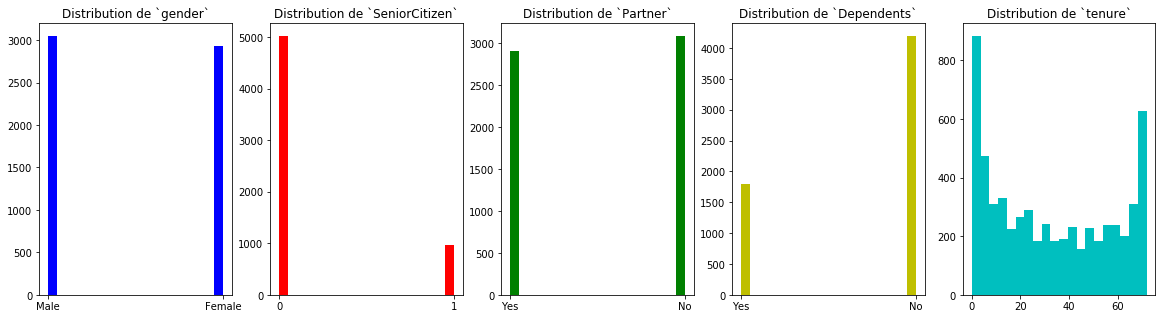

In [109]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

axes[0].hist(churn['gender'], color='b', bins=20)
axes[0].set_title('Distribution de `gender`')
axes[1].hist(churn['SeniorCitizen'], color='r', bins=20)
axes[1].set_title('Distribution de `SeniorCitizen`')
axes[2].hist(churn['Partner'], color='g', bins=20)
axes[2].set_title('Distribution de `Partner`')
axes[3].hist(churn['Dependents'], color='y', bins=20)
axes[3].set_title('Distribution de `Dependents`')
axes[4].hist(churn['tenure'], color='c', bins=20)
axes[4].set_title('Distribution de `tenure`');

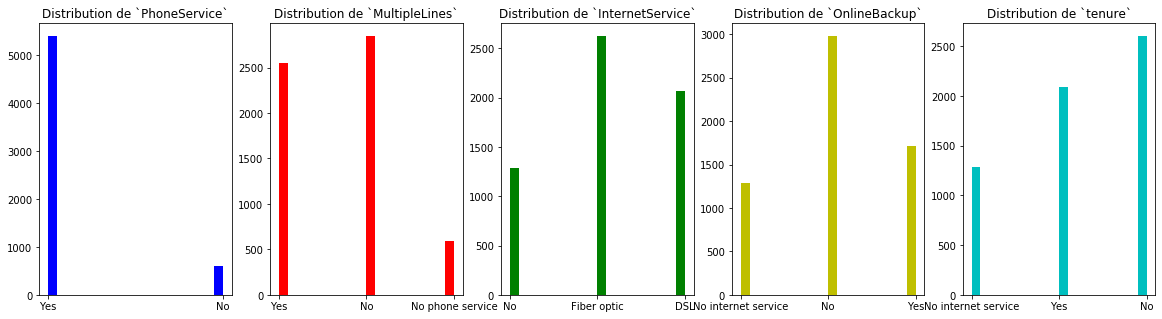

In [110]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

axes[0].hist(churn['PhoneService'], color='b', bins=20)
axes[0].set_title('Distribution de `PhoneService`')
axes[1].hist(churn['MultipleLines'], color='r', bins=20)
axes[1].set_title('Distribution de `MultipleLines`')
axes[2].hist(churn['InternetService'], color='g', bins=20)
axes[2].set_title('Distribution de `InternetService`')
axes[3].hist(churn['OnlineSecurity'], color='y', bins=20)
axes[3].set_title('Distribution de `OnlineBackup`')
axes[4].hist(churn['OnlineBackup'], color='c', bins=20)
axes[4].set_title('Distribution de `tenure`');

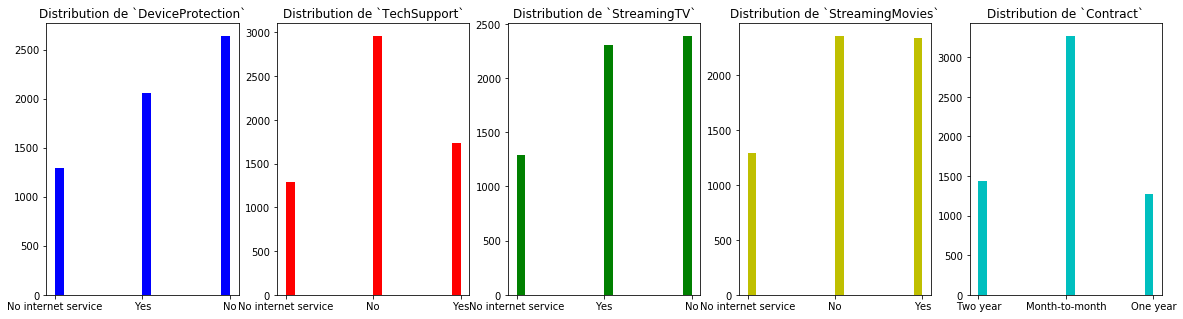

In [111]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

axes[0].hist(churn['DeviceProtection'], color='b', bins=20)
axes[0].set_title('Distribution de `DeviceProtection`')
axes[1].hist(churn['TechSupport'], color='r', bins=20)
axes[1].set_title('Distribution de `TechSupport`')
axes[2].hist(churn['StreamingTV'], color='g', bins=20)
axes[2].set_title('Distribution de `StreamingTV`')
axes[3].hist(churn['StreamingMovies'], color='y', bins=20)
axes[3].set_title('Distribution de `StreamingMovies`')
axes[4].hist(churn['Contract'], color='c', bins=20)
axes[4].set_title('Distribution de `Contract`');

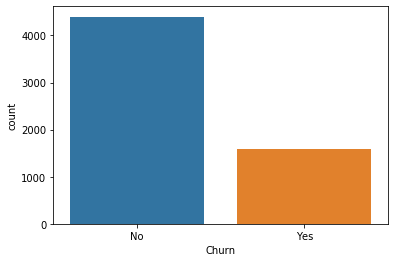

In [114]:
sns.countplot(x='Churn', data=churn);

### <span style="color:blue"> **D. Statistiques descriptives**</span> 

#### <span style="color:blue"> **1. Analyse de la corrélation entre les variables categorielles et Churn**</span> 

<span style="color:red"> ** gender **</span> 

In [51]:
table = pd.crosstab(churn['gender'],churn['Churn'])

table

Churn,No,Yes
gender,,
Female,2145,791
Male,2254,796


In [52]:
from scipy.stats import chi2_contingency

resultats_test = chi2_contingency(table)

resultats_test

statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)

0.5033127437695076 0.4780481366595716 1


In [53]:
def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, churn.shape[0])

0.0

In [ ]:
#Le V_Cramer est nul.
#Il n'y a pas de correlation entre les deux variables.

<span style="color:red"> ** SeniorCitizen **</span> 

In [90]:
table = pd.crosstab(churn['SeniorCitizen'],churn['Churn'])

table

Churn,No,Yes
SeniorCitizen,,
0,3835,1185
1,564,402


In [91]:
resultats_test = chi2_contingency(table)

statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)

133.93678615580507 5.640302823047313e-31 1


In [92]:
def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, churn.shape[0])

0.14903567653184807

In [ ]:
#Le V_Cramer n'est pas très élevé.
#On en déduit qu'il n'y a pas une forte corrélation entre les deux variables mais qu'elle n'est pas non plus négligeable.

<span style="color:red"> ** Partner **</span> 

In [48]:
table = pd.crosstab(churn['Partner'],churn['Churn'])

table

Churn,No,Yes
Partner,,
No,2071,1011
Yes,2328,576


In [49]:
resultats_test = chi2_contingency(table)

statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)

128.40528495997583 9.151167294213974e-30 1


In [50]:
def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, churn.shape[0])

0.14590204048931557

<span style="color:red"> ** Dependents **</span> 

In [57]:
table = pd.crosstab(churn['Dependents'],churn['Churn'])

table

Churn,No,Yes
Dependents,,
No,2889,1306
Yes,1510,281


In [58]:

resultats_test = chi2_contingency(table)

statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, churn.shape[0])

152.84057263391773 4.150645452889598e-35 1


0.15928013173545455

<span style="color:red"> ** PhoneService **</span> 

In [60]:
table = pd.crosstab(churn['PhoneService'],churn['Churn'])

table

Churn,No,Yes
PhoneService,,
No,441,149
Yes,3958,1438


In [61]:
resultats_test = chi2_contingency(table)

statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, churn.shape[0])

0.46213085804715237 0.49662979409934027 1


0.0

In [ ]:
#Le V_Cramer est nul.
#Il n'y a pas de correlation entre les deux variables.

<span style="color:red"> ** MultipleLines **</span> 

In [62]:
table = pd.crosstab(churn['MultipleLines'],churn['Churn'])

table

Churn,No,Yes
MultipleLines,,
No,2133,715
No phone service,441,149
Yes,1825,723


In [63]:
resultats_test = chi2_contingency(table)

statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, churn.shape[0])

7.91152503084793 0.019144065337666494 2


0.03142718049242858

<span style="color:red"> ** InternetService **</span> 

In [64]:
table = pd.crosstab(churn['InternetService'],churn['Churn'])

table

Churn,No,Yes
InternetService,,
DSL,1671,397
Fiber optic,1536,1091
No,1192,99


In [65]:
resultats_test = chi2_contingency(table)

statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, churn.shape[0])

596.1942893082709 3.451874563052055e-130 2


0.3150881304431438

<span style="color:red"> ** OnlineSecurity **</span> 

In [66]:
table = pd.crosstab(churn['OnlineSecurity'],churn['Churn'])

table

Churn,No,Yes
OnlineSecurity,,
No,1740,1242
No internet service,1192,99
Yes,1467,246


In [67]:
resultats_test = chi2_contingency(table)

statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, churn.shape[0])

715.84087021586 3.60686653344072e-156 2


0.3453572136331341

<span style="color:red"> ** OnlineBackup **</span> 

In [69]:
table = pd.crosstab(churn['OnlineBackup'],churn['Churn'])

table

Churn,No,Yes
OnlineBackup,,
No,1567,1038
No internet service,1192,99
Yes,1640,450


In [70]:
resultats_test = chi2_contingency(table)

statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, churn.shape[0])

499.6370333830538 3.2003444505960775e-109 2


0.288352770899987

<span style="color:red"> ** DeviceProtection **</span> 

In [71]:
table = pd.crosstab(churn['DeviceProtection'],churn['Churn'])

table

Churn,No,Yes
DeviceProtection,,
No,1609,1031
No internet service,1192,99
Yes,1598,457


In [72]:
resultats_test = chi2_contingency(table)

statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, churn.shape[0])

467.66226236198463 2.808212905679805e-102 2


0.2789351817560013

<span style="color:red"> ** TechSupport **</span> 

In [75]:
table = pd.crosstab(churn['TechSupport'],churn['Churn'])

table

Churn,No,Yes
TechSupport,,
No,1738,1222
No internet service,1192,99
Yes,1469,266


In [76]:
resultats_test = chi2_contingency(table)

statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, churn.shape[0])

678.116574926022 5.608628974574772e-148 2


0.33610781667966555

<span style="color:red"> ** StreamingTV	 **</span> 

In [78]:
table = pd.crosstab(churn['StreamingTV'],churn['Churn'])

table

Churn,No,Yes
StreamingTV,,
No,1590,799
No internet service,1192,99
Yes,1617,689


In [79]:

resultats_test = chi2_contingency(table)

statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, churn.shape[0])

307.63705976625636 1.5756554547823524e-67 2


0.2259803608658932

<span style="color:red"> ** StreamingMovies **</span> 

In [87]:
table = pd.crosstab(churn['StreamingMovies'],churn['Churn'])

resultats_test = chi2_contingency(table)

statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, churn.shape[0])

308.9529634788501 8.160493002875635e-68 2


0.22646631196721448

<span style="color:red"> ** Contract	 **</span> 

In [88]:
table = pd.crosstab(churn['Contract'],churn['Churn'])

resultats_test = chi2_contingency(table)

statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, churn.shape[0])

1003.1751885538325 1.4563830453693763e-218 2


0.4089996113621793

<span style="color:red"> ** PaperlessBilling **</span> 

In [83]:
table = pd.crosstab(churn['PaperlessBilling'],churn['Churn'])

resultats_test = chi2_contingency(table)

statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, churn.shape[0])

212.94796198095645 3.124099617461221e-48 1


0.18818386324254757

<span style="color:red"> ** PaymentMethod **</span> 

In [84]:
table = pd.crosstab(churn['PaymentMethod'],churn['Churn'])

resultats_test = chi2_contingency(table)

statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, churn.shape[0])

532.8500087311085 3.623648567257548e-115 3


0.2975392035611223

<span style="color:red"> ** DeviceProtection **</span> 

In [85]:
table = pd.crosstab(churn['DeviceProtection'],churn['Churn'])

resultats_test = chi2_contingency(table)

statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)

def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, churn.shape[0])

467.66226236198463 2.808212905679805e-102 2


0.2789351817560013

#### <span style="color:blue"> **2. Analyse de la corrélation entre les variables numériques et Churn**</span> 

In [94]:
import statsmodels.api 

result = statsmodels.formula.api.ols('tenure ~ Churn', data=churn).fit()
table = statsmodels.api.stats.anova_lm(result)

table

,df,sum_sq,mean_sq,F,PR(>F)
Churn,1.0,4.368220e+05,436821.951981,827.070674,1.774697e-170
Residual,5984.0,3.160483e+06,528.155532,NaN,NaN


In [96]:
import statsmodels.api 

result = statsmodels.formula.api.ols('MonthlyCharges ~ Churn', data=churn).fit()
table = statsmodels.api.stats.anova_lm(result)

table

,df,sum_sq,mean_sq,F,PR(>F)
Churn,1.0,1.893032e+05,189303.190823,216.244704,4.090488e-48
Residual,5984.0,5.238465e+06,875.411916,NaN,NaN


In [98]:
import statsmodels.api 

result = statsmodels.formula.api.ols('TotalCharges ~ Churn', data=churn).fit()
table = statsmodels.api.stats.anova_lm(result)

table

,df,sum_sq,mean_sq,F,PR(>F)
Churn,1.0,1.201423e+09,1.201423e+09,242.007122,1.586720e-53
Residual,5984.0,2.970705e+10,4.964413e+06,NaN,NaN


## <span style="color:red"> II. Visualisation des données</span> 

### <span style="color:blue"> **A. Visualisation et correlation  des variables numériques**</span> 

In [134]:
numeric_cols = churn.select_dtypes(include='number')

In [135]:
numeric_cols.iplot(kind='histogram', subplots=True,bins=50);

In [123]:
#correlation entre les variables numeriques 
numeric_cols.corr()


,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.256983,0.826981
MonthlyCharges,0.256983,1.000000,0.656322
TotalCharges,0.826981,0.656322,1.000000


In [ ]:
#Il ya pas de probleme de multicolinéarité entre les variables numeriques

In [136]:
#Correlation entre les variables numeriques et la variable cible Churn
#remplacer les modalités de la variable Churn par 0 et 1
churn['Churn'].replace(('Yes','No'),(1,0), inplace = True)

numeric_cols_churn = churn.select_dtypes(include='number')

numeric_cols_churn.corr()["Churn"].sort_values().drop("Churn").iplot(kind = "barh");

#Il n'ya pas de problème de multicolinéarité entre les variables numeriques et la variable Churn

### <span style="color:blue"> **B. Visualisation des variables catégorielles**</span> 

In [137]:
cat_cols = churn.select_dtypes(include='object')
cat_cols.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3050,5020,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006


In [138]:
cat_cols.describe().T.style.background_gradient(subset=['unique','freq','count'], cmap='RdPu')
#cat_cols['SeniorCitizen'].value_counts()

,count,unique,top,freq
gender,5986,2,Male,3050
SeniorCitizen,5986,2,0,5020
Partner,5986,2,No,3082
Dependents,5986,2,No,4195
PhoneService,5986,2,Yes,5396
MultipleLines,5986,3,No,2848
InternetService,5986,3,Fiber optic,2627
OnlineSecurity,5986,3,No,2982
OnlineBackup,5986,3,No,2605
DeviceProtection,5986,3,No,2640


In [139]:
#La repartition des données catégorielles
#
cat_cols_first = cat_cols.iloc[:, 0:5]
cat_cols_first.iplot(kind='histogram', subplots=True,bins=50)

In [140]:
cat_cols_last = cat_cols.iloc[:, 6:]
cat_cols_last.iplot(kind='histogram', subplots=True,bins=50)

In [ ]:
#il ya plus de clients qui souscrivent un contrat month-to-month 
#la plupart des clients qui ont un contrat de deux années ne résilient pas leurs abonnement

In [141]:
px.histogram(churn, x=churn['Contract'], color="Churn")

In [ ]:
Les clients qui ont un contrat internet DSL ont plus tendance a ne pas résilier leurs abonnement 

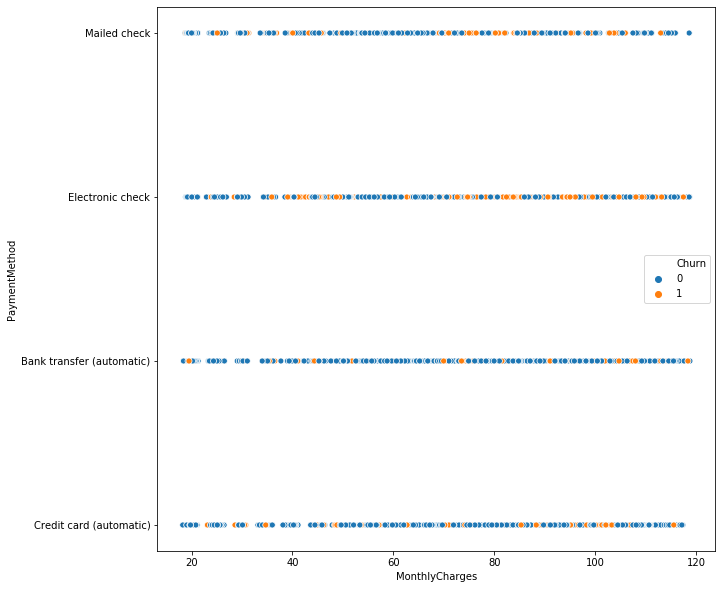

In [142]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='MonthlyCharges', y='PaymentMethod', data=churn, hue='Churn')
plt.show()

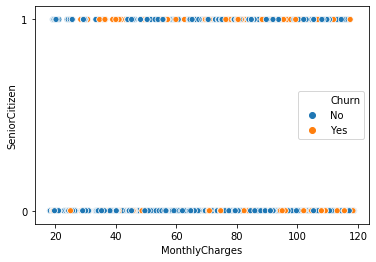

In [115]:
sns.scatterplot(x="MonthlyCharges", y="SeniorCitizen", hue="Churn", data=churn);

# Les clients seniors ont plus tendance à résilier leurs abonnements indépendamment du prix.

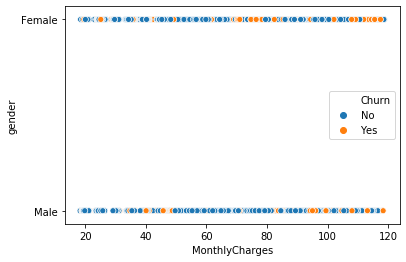

In [116]:
sns.scatterplot(x="MonthlyCharges", y="gender", hue="Churn", data=churn);

# On observe un nombre plus important de résiliation chez les femmmes.

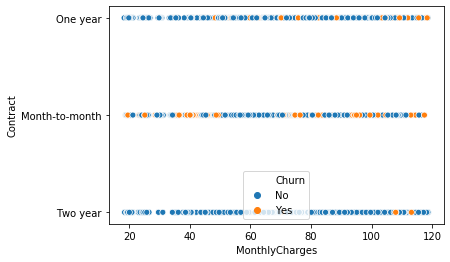

In [117]:
sns.scatterplot(x="MonthlyCharges", y="Contract", hue="Churn", data=churn);

# On observe un nombre important de résiliation lorsque le contrat est mensuel même sil le prix de l'abonnement est moindre.

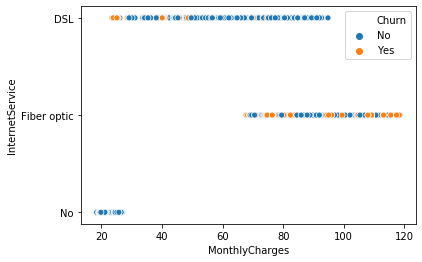

In [118]:
sns.scatterplot(x="MonthlyCharges", y="InternetService", hue="Churn", data=churn);

# Il y'a un nombre faible de résiliation chez les clients DSL

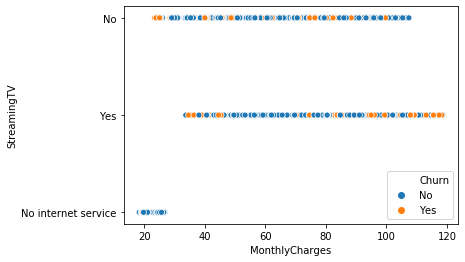

In [119]:
sns.scatterplot(x="MonthlyCharges", y="StreamingTV", hue="Churn", data=churn);

# Le service StreamingTV ne permet pas de réduire les résiliations.

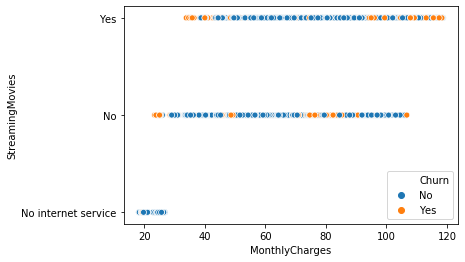

In [120]:
sns.scatterplot(x="MonthlyCharges", y="StreamingMovies", hue="Churn", data=churn);

# Le service StreamingTV ne permet pas de réduire les résiliations.

### <span style="color:blue"> **C. Visualisation de la variable à expliquer Churn **</span> 

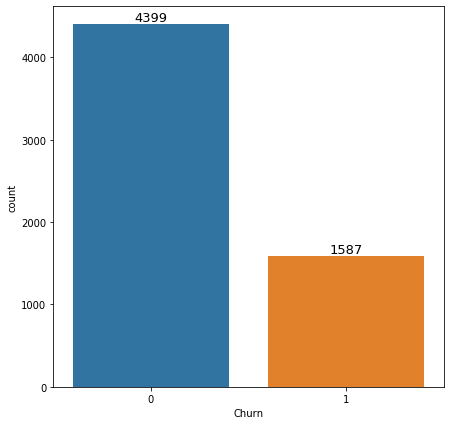

In [144]:
churn["Churn"].value_counts()

plt.figure(figsize = (7, 7))
sns.countplot(x = churn["Churn"], data = churn)
for index,value in enumerate(churn["Churn"].value_counts()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)
     

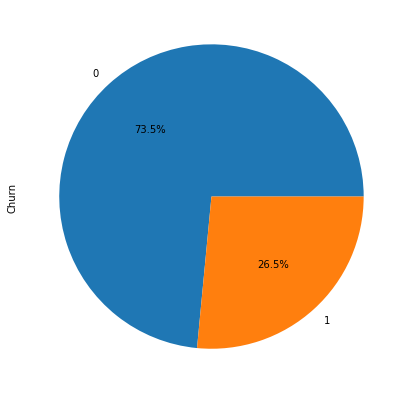

In [145]:
#plt.figure(figsize = (7, 7))

churn["Churn"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(7,7));



73.5% des clients n'ont pas résilié leurs abonnement
26.5% des clients ont résilié leurs abonnement

## <span style="color:red"> III. Entraînement et évaluation de modèles de machine learning</span> 

### Implémentation 

In [148]:
churn.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.1,1734.65,0


In [155]:
# On sépare les variables explicatives de la target
X = churn.drop(["Churn"], axis = 1)
y = churn.Churn


In [156]:
# On encode les variables catégorielles nécessaire à l'entraînement du modèle
X = pd.get_dummies(X)
X

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,72,24.10,1734.65,0,1,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
1,44,88.15,3973.20,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
2,38,74.95,2869.85,1,0,0,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
3,4,55.90,238.50,0,1,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
4,2,53.45,119.50,0,1,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,95.00,95.00,0,1,1,0,0,1,1,...,1,1,0,0,0,1,0,0,1,0
5982,23,91.10,2198.30,1,0,1,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
5983,12,21.15,306.05,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
5984,12,99.45,1200.15,0,1,0,1,1,0,1,...,1,1,0,0,0,1,0,0,1,0


In [157]:
# Séparation du jeu en train et en test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


In [158]:
# Normalisation des données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [167]:

import warnings
warnings.filterwarnings('ignore')

# Instanciation d'un premier modèle
log = LogisticRegression()

# Entraînement 
log.fit(X_train_norm, y_train)

# Prédiction 
y_pred_test_logreg = log.predict(X_test_norm)

In [168]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)

# Entraînement du modèle knn sur le jeu d'entraînement
knn.fit(X_train_norm, y_train)     

# Prédiction sur les données de test
y_pred_test_knn  = knn.predict(X_test)
y_pred_test_knn

array([0, 0, 0, ..., 0, 0, 0])

# Mesure de performance

In [187]:
# Score des modèle
print(log.score(X_test_norm, y_test))
print(knn.score(X_test_norm, y_test))



0.8062792251169004
0.7615230460921844


In [188]:
from sklearn.metrics import accuracy_score, precision_score,recall_score

print("LogReg Accuracy:", accuracy_score(y_test, y_pred_test_logreg))
print("nKNN Accuracy:", accuracy_score(y_test, y_pred_test_knn))

LogReg Accuracy: 0.8062792251169004
nKNN Accuracy: 0.7428189712758851


In [171]:

# On vérifie la répartition des classes

print("Répartition des classes : \n",y.value_counts(),"\n")

# La classe Yes  est surreprésentée par rapport à la classe No.

Répartition des classes : 
 0    4399
1    1587
Name: Churn, dtype: int64 



In [ ]:
# On est confronté à un déséquilibre de classes, il est préférable d'utiliser la balanced accuracy.

In [189]:
from sklearn.metrics import balanced_accuracy_score
# On affiche la balanced accuracy des  modèles 

print("LogReg Balanced accuracy :",balanced_accuracy_score(y_test,y_pred_test_logreg))
print("nKNN Balanced accuracy:",balanced_accuracy_score(y_test,y_pred_test_knn))

LogReg Balanced accuracy : 0.7167733345790899
nKNN Balanced accuracy: 0.5


In [ ]:
# Les résultats obtenus avec la balanced accuracy sont beaucoup plus faibles que ceux obtenus avec 
# l'accuracy

# On peut confirmer que le modèle  souffre du déséquilibre de classes. 

In [194]:
print("LogReg Précision:", precision_score(y_test, y_pred_test_logreg, pos_label = 1))
print("nKNN Précision:", precision_score(y_test, y_pred_test_knn, pos_label = 1))

print("LogReg Rappel:", recall_score(y_test, y_pred_test_logreg, pos_label = 1))
print("nKNN Rappel:", recall_score(y_test, y_pred_test_knn, pos_label = 1))

LogReg Précision: 0.6507936507936508
nKNN Précision: 0.0
LogReg Rappel: 0.5324675324675324
nKNN Rappel: 0.0


In [195]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1112
           1       0.00      0.00      0.00       385

    accuracy                           0.74      1497
   macro avg       0.37      0.50      0.43      1497
weighted avg       0.55      0.74      0.63      1497



In [196]:
print(classification_report(y_test, y_pred_test_logreg))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1112
           1       0.65      0.53      0.59       385

    accuracy                           0.81      1497
   macro avg       0.75      0.72      0.73      1497
weighted avg       0.80      0.81      0.80      1497




from sklearn.metrics import f1_score

print("F1 KNN:", f1_score(y_test, y_pred_test_knn, pos_label = 1))

print("F1 LogReg:", f1_score(y_test, y_pred_test_logreg, pos_label = 1))

In [ ]:
# le modèle de regression logistique (classification linéaire) a le F1-Score le plus élevé , il est donc préférable au modèle des K-Nearest Neighbors (classification non linéaire)

In [198]:
# Matrice de confusion

pd.crosstab(y_test, y_pred_test_knn ,rownames=['Realité'], colnames=['Prédiction'])

Prédiction,0
Realité,
0,1112
1,385


In [200]:
pd.crosstab(y_test, y_pred_test_logreg ,rownames=['Realité'], colnames=['Prédiction'])

Prédiction,0,1
Realité,,
0,1002,110
1,180,205


#### Application du modele arbre de décision

In [203]:
model = DecisionTreeClassifier(criterion = "gini")
model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)

print(model.score(X_test_norm, y_test))
#Le modele arbre de decision est assez performant 

0.7140948563794255


In [204]:
#Matrice de confusion
cm = confusion_matrix(y_pred, y_test)
print(cm)

[[919 235]
 [193 150]]
